## 安然数据
首先确定目的是为了进行数据分析，因此需要从数据分析的过程去看看怎么样使用 R 来进行相关过程。本次将以安然的部分数据来进行分析，重点将以 EDA 的角度来进行：

1. 读取数据
2. 数据清理
3. **探索分析**
    * 单变量分析
    * 双变量分析
    * 多变量分析
4. 建模

In [1]:
library(repr)
# change the plot configure
options(repr.plot.width=5, repr.plot.height=4)

### 读取数据
R 同样可以读取多种类型的数据文件，例如Excel、XML、SPSS、SAS 和 MATLAB，剪贴板，甚至是网络数据。常用的函数中需要注意，`read.csv()` 和 `read.csv2()` 的差异——后者默认是使用`;` 作为分隔符，`,` 作为千分位的 CSV 文件类型。对于其他异常数据作为缺失值，可以通过 `na.strings` 参数进行调整——`na.strings=c("NULL", "#N/A", "#DIV/0")`。

<font size=1 color="green">补充信息：
    <ol>
        <li>如果需要保存相应的数据，那么可以使用 <code>write.table</code> 等函数</li>
        <li>此外如果需要<b>交互</b>，可以使用 <code>readline()</code></li>
        <li>下载数据，可以使用 <code>download.file()</code> 或者 <code>RCurl</code>包获取 HTML 或 XML 数据，而 <code>XML</code> 包中的相关函数可以进行页面解析
    </ol>
</font>

In [2]:
df <- read.csv("./data/enron.csv")

### 清理数据
#### 评估数据
通过相应的函数获取到了数据信息，那么接下来需要了解数据信息以确定接下来的数据清洗的相对应的工作。Python 中 Pandas 提供了很多方便的方式进行数据访问，同样地在 R 中可以使用一些简单的函数来完成相应的工作：

1. 访问 `data.frame` 的前后部分数据，`head()` 与 `tail()`
2. 数据总体信息，例如字段名称以及数据类型 `str()`
3. 字段列名称，`names()`
4. 数据维度信息，`dim()`、`nrow()` 以及 `ncol()`，此外还可以使用 `NROW()` 和 `NCOL()` 来获取向量数据的维度——是将向量作为了一维矩阵
5. 判断数据是否为缺失值，`is.nan()`。此外需要注意 R 是区分缺失值和占位符值——`is.nan()` 和 `is.na()` 检测的是两种情况
6. 行或列方向求和， `rowSums()` 与 `colSums()`

In [3]:
# 使用 head 函数访问前部分数据
head(df, n=2)

Name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,⋯,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,⋯,304805,152,FALSE,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,⋯,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,182466,257817


In [4]:
# 了解数据整体信息
str(df)

'data.frame':	146 obs. of  22 variables:
 $ Name                     : Factor w/ 146 levels "ALLEN PHILLIP K",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ bonus                    : num  4175000 NaN NaN 1200000 400000 ...
 $ deferral_payments        : num  2869717 178980 NaN 1295738 260455 ...
 $ deferred_income          : num  -3081055 NaN -5104 -1386055 -201641 ...
 $ director_fees            : num  NaN NaN NaN NaN NaN ...
 $ email_address            : Factor w/ 112 levels "NaN","a..martin@enron.com",..: 80 1 30 1 22 1 97 105 1 16 ...
 $ exercised_stock_options  : num  1729541 257817 4046157 6680544 NaN ...
 $ expenses                 : num  13868 3486 56301 11200 129142 ...
 $ from_messages            : num  2195 NaN 29 NaN NaN ...
 $ from_poi_to_this_person  : num  47 NaN 39 NaN NaN NaN 144 228 NaN NaN ...
 $ from_this_person_to_poi  : num  65 NaN 0 NaN NaN NaN 386 108 NaN NaN ...
 $ loan_advances            : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ long_term_incentive      : num  3

In [5]:
# names 函数不仅被用于获取字段名称，而且还可以对列名称进行修改——names(test) <- c("a", "b")
names(df)

[1] "Name"                      "bonus"                    
 [3] "deferral_payments"         "deferred_income"          
 [5] "director_fees"             "email_address"            
 [7] "exercised_stock_options"   "expenses"                 
 [9] "from_messages"             "from_poi_to_this_person"  
[11] "from_this_person_to_poi"   "loan_advances"            
[13] "long_term_incentive"       "other"                    
[15] "poi"                       "restricted_stock"         
[17] "restricted_stock_deferred" "salary"                   
[19] "shared_receipt_with_poi"   "to_messages"              
[21] "total_payments"            "total_stock_value"

In [6]:
# 注意⚠️，此部分作为了解
t <- list(d=c(1, 2, 3))
print(t)
names(t) <- "b"
cat("修改名称后数据：\n")
print(t)

$d
[1] 1 2 3

修改名称后数据：
$b
[1] 1 2 3



以上内容可以帮助了解数据字段相关类型和名称，如果需要了解数据字段的意义，需要了解数据背景信息：
* 财务特征 : [‘salary’, ‘deferral_payments’, ‘total_payments’, ‘loan_advances’, ‘bonus’, ‘restricted_stock_deferred’, ‘deferred_income’, ‘total_stock_value’, ‘expenses’, ‘exercised_stock_options’, ‘other’, ‘long_term_incentive’, ‘restricted_stock’, ‘director_fees’]

* 邮件特征 : [‘to_messages’, ‘email_address’, ‘from_poi_to_this_person’, ‘from_messages’, ‘from_this_person_to_poi’, ‘shared_receipt_with_poi’]

* POI 嫌疑人标签

----
总体来看以上相应的步骤中，可以看出一些相应的信息。首先观察这个数据集的基本信息，有 **146** 条数据，**22** 个变量。这是了解数据的第一步，接下来来看每个字段的字段类型，大部分都是 Num——数值型数据,有一个logi——逻辑型数据，还有factor——因子型数据。查看会发现 factor 数据，email_address 和 Name 是在**读取数据过程中被转换为了 factor 类型；可以通过 `stringAsFactors` 参数进行调整**

如果评估数据其他情况，例如**缺失值**、**异常值**，可以采用其他方式来解决：
* 缺失值  
    * 字段和列数据缺失检查 除了可以使用 `colSums()`, `rowSums()` 配合 `is.na()` 进行计算意外还可以通过其他 package 来进行处理，例如 `VIM` 中 `aggr`进行可视化显示缺失情况或者显示统计数据
    * 缺失数据检测，`is.na()` 可以对每个元素数据进行判断，`complete.cases()` 可以对整行数据进行判读是否完全缺失——如果数据完整，即没有缺失值返回 TRUE，反之为 FALSE

In [7]:
# 各字段缺失值情况
colSums(is.na(df))[1:4]

Name             bonus deferral_payments   deferred_income 
                0                64               107                97

In [8]:
sum(is.na(df))

[1] 1323

In [9]:
complete.cases(df)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE

In [10]:
library(VIM)

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep



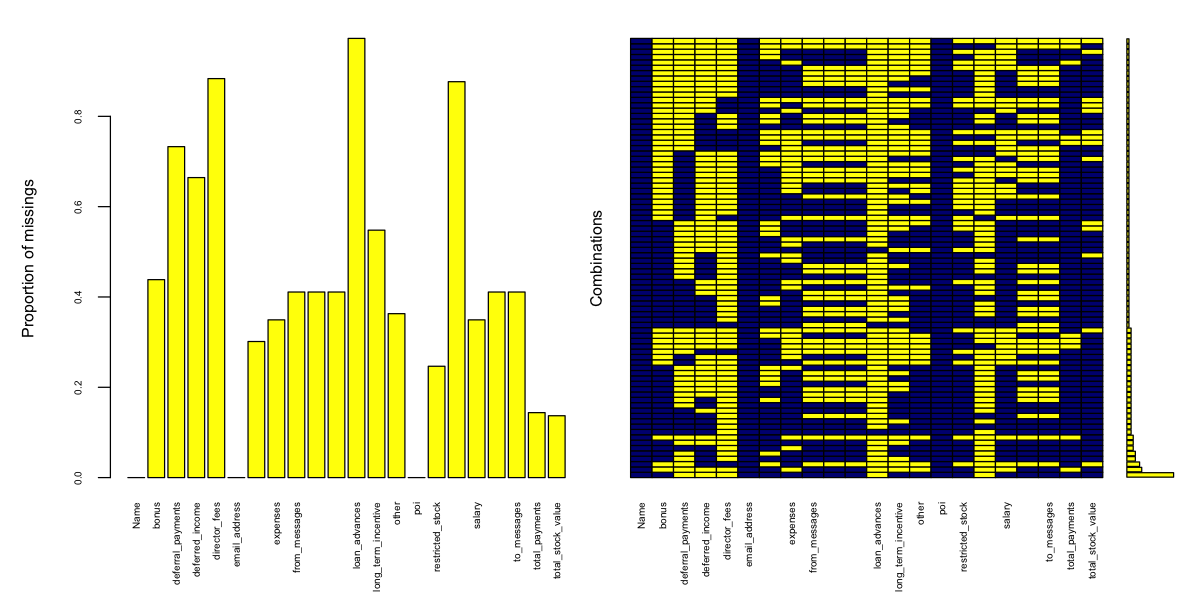

In [11]:
# 右侧图形右侧条形图是一个比例情况，需要结合⏰ mice 的 md.pattern 数据来解读

# change the plot configure
options(repr.plot.width=10, repr.plot.height=5)
aggr(df, sort.vars=TRUE, cex.lab=.8, cex.axis=.5, gap=2, col=c('navyblue','yellow'))


In [12]:
# 如果不需要绘图，那么就可以得到缺失值数据统计
aggr(df, plot=FALSE)


 Missings in variables:
                  Variable Count
                     bonus    64
         deferral_payments   107
           deferred_income    97
             director_fees   129
   exercised_stock_options    44
                  expenses    51
             from_messages    60
   from_poi_to_this_person    60
   from_this_person_to_poi    60
             loan_advances   142
       long_term_incentive    80
                     other    53
          restricted_stock    36
 restricted_stock_deferred   128
                    salary    51
   shared_receipt_with_poi    60
               to_messages    60
            total_payments    21
         total_stock_value    20

直接得到的数据是是没有进行排序的，如果需要排序的话可以提取出 missings 数值进行排序。
```
missing <- aggr(df, plot=F)$missings
missing[order(missing$Count, decreasing=T),]
```

In [13]:
# 对于缺失值严重的字段，这里直接进行删除处理方案以及后续不需要使用的字段 email_address
df.enron <- subset(df, select = 
                   -c(loan_advances, director_fees, restricted_stock_deferred, 
                      restricted_stock_deferred, deferred_income, email_address,
                     other, Name))

In [14]:
library(mice)
# 注意⏰ 该内容只作补充了解
# 解读 df 的 md.pattern 数据
# 分别表示了每个字段的缺失值模式，1 为该字段无缺失，0 为该字段有缺失值
# 左边表示统计的数量，例如第一行是所有字段均没有缺失值的情况为 22，
# 第二行是缺失 bonus 字段模式为 17 个以此类推。右边数据为选择的缺失模式
md.pattern(df[1:3], plot = F)

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind



,Name,bonus,deferral_payments,
22,1,1,1,0
60,1,1,0,1
17,1,0,1,1
47,1,0,0,2
,0,64,107,171


异常值  异常值判断方法有多种选择，以统计学角度的标准偏差、箱型图检验法检验，或者其他方法进行判断
* 标准偏差法 
* 箱型图检测法 
* 其他检测法 例如通过散点图确认点是否在“群”内进行判断

In [15]:
summary(df.enron)

     bonus          deferral_payments  exercised_stock_options
 Min.   :   70000   Min.   : -102500   Min.   :     3285      
 1st Qu.:  431250   1st Qu.:   81573   1st Qu.:   527886      
 Median :  769375   Median :  227449   Median :  1310814      
 Mean   : 2374235   Mean   : 1642674   Mean   :  5987054      
 3rd Qu.: 1200000   3rd Qu.: 1002672   3rd Qu.:  2547724      
 Max.   :97343619   Max.   :32083396   Max.   :311764000      
 NA's   :64         NA's   :107        NA's   :44             
    expenses       from_messages      from_poi_to_this_person
 Min.   :    148   Min.   :   12.00   Min.   :  0.00         
 1st Qu.:  22614   1st Qu.:   22.75   1st Qu.: 10.00         
 Median :  46950   Median :   41.00   Median : 35.00         
 Mean   : 108729   Mean   :  608.79   Mean   : 64.90         
 3rd Qu.:  79952   3rd Qu.:  145.50   3rd Qu.: 72.25         
 Max.   :5235198   Max.   :14368.00   Max.   :528.00         
 NA's   :51        NA's   :60         NA's   :60             


In [16]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(purrr)


Attaching package: ‘tidyr’

The following object is masked from ‘package:mice’:

    complete


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘purrr’

The following object is masked from ‘package:data.table’:

    transpose



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 774 rows containing non-finite values (stat_bin).”

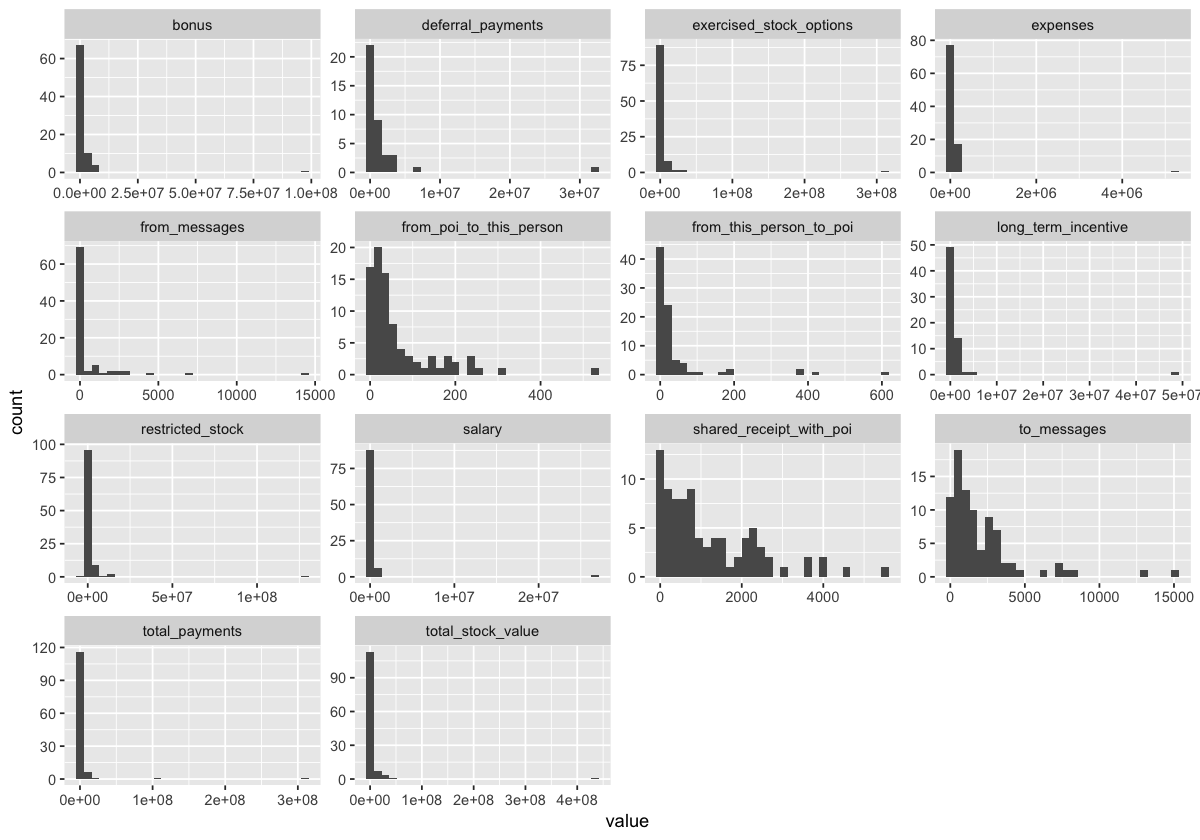

In [17]:
# change the plot configure
options(repr.plot.width=10, repr.plot.height=7)

df.enron  %>% 
    keep(is.numeric)  %>% # 删选满足条件数据类型
    gather()  %>% 
    ggplot(aes(value)) + 
    facet_wrap(~key, scales = "free") +
    geom_histogram()

通过以上图形，可以看出很多字段中存在异常值，例如 bonus、deferral_payments。对于异常值是否删除需要根据不同的情况来判断。而这里需要对一场数据进行探索，如果需要选出异常数据——可以使用 `boxplot()` 中的 `out` 数据

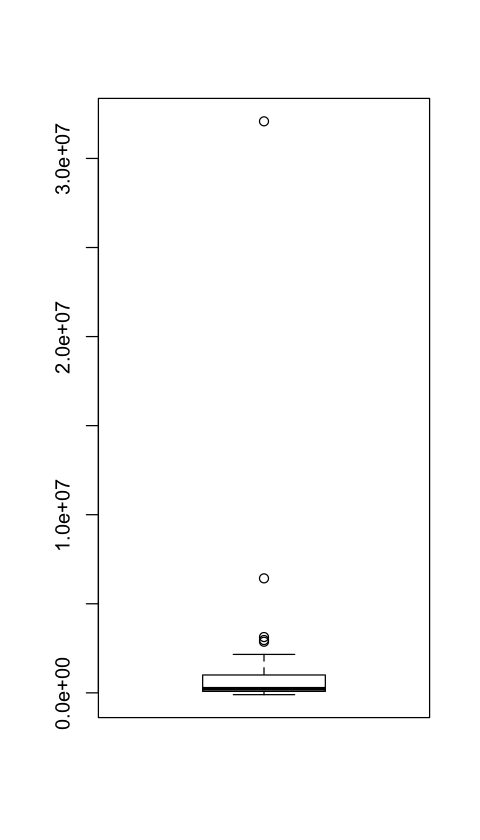

In [18]:
# change the plot configure
options(repr.plot.width=4, repr.plot.height=7)

outlier <- boxplot(df.enron$deferral_payments)$out

In [19]:
# 筛选出异常数据
df.enron[which(df.enron$deferral_payments %in% outlier),]

,bonus,deferral_payments,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
1,4175000,2869717,1729541,13868,2195,47,65,304805,FALSE,126027,201955,1407,2902,4484442,1729541
48,2000000,6426990,10433518,86987,21,242,6,1617011,FALSE,4188667,1060932,2979,3275,17252530,14622185
67,NaN,3131860,5210569,NaN,1073,44,15,NaN,FALSE,2046079,NaN,1074,2350,3131860,7256648
69,NaN,2964506,2282768,4994,17,10,17,NaN,FALSE,NaN,130724,119,128,3100224,2282768
131,97343619,32083396,311764000,5235198,NaN,NaN,NaN,48521928,FALSE,130322299,26704229,NaN,NaN,309886585,434509511


#### 清理数据
数据清理，这里只简单从异常值和缺失值的角度来说。
* 异常值的处理需要根据具体情况判断是否合理。从上面可以看出 131 行数据为汇总数据，不应该作为某个职员来分析，应该采取删除。删除 Total 异常数据之后，得到了可视化结果。再次进行确认相对来说比之前要更可信了，但是还是存在其他异常数据可以继续做单变量分析和探讨。

In [20]:
# 删除异常值，再进行可视化
df.enron.clean <- df.enron[-131, ]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 769 rows containing non-finite values (stat_bin).”

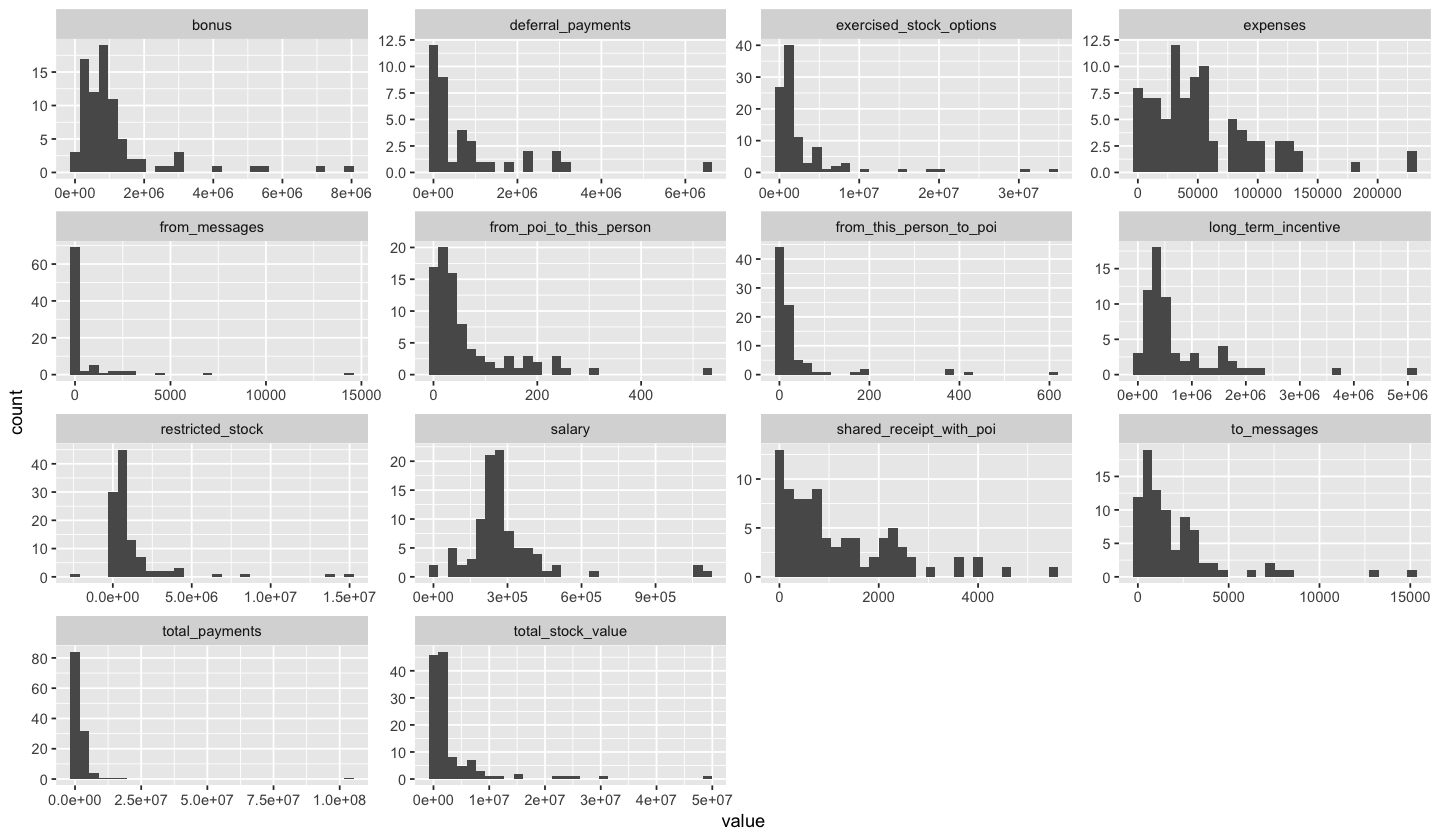

In [21]:
# change the plot configure
options(repr.plot.width=12, repr.plot.height=7)

df.enron.clean %>%
  keep(is.numeric) %>%
  gather()%>%
  ggplot(aes(value))+
  facet_wrap(~key,scales = 'free')+
  geom_histogram()

Warning message in self$trans$transform(x):
“產生了 NaNs”Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 804 rows containing non-finite values (stat_bin).”

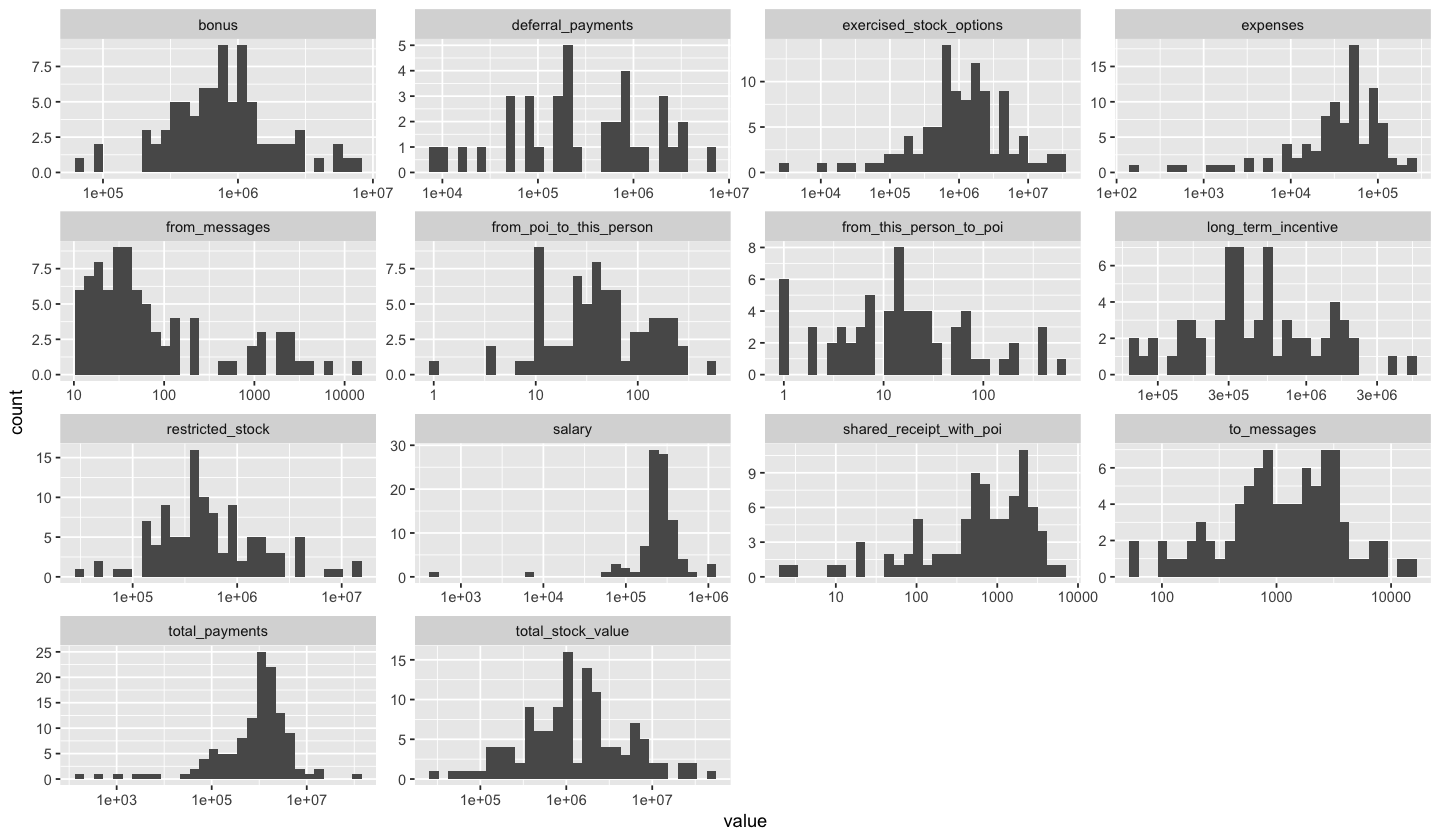

In [22]:
df.enron.clean %>%
  keep(is.numeric) %>%
  gather()%>%    # 使用 gather 能帮助完成宽数据变成长数据
  ggplot(aes(value))+
  facet_wrap(~key,scales = 'free')+
  geom_histogram() +
    scale_x_log10()

上面的分析结果，收发邮件（from_messages 和 to_messages）大部分人很少（使用对数转换后在 from_messages 上表现更明显），存在某些人收发很多邮件的可能行。为了分析 poi 的信息的角度，不能简单的判断说这个是异常的情况。因此考虑将以上数据进行转换为和 poi 相关的比例信息

In [23]:
df.enron.clean <- df.enron.clean  %>% 
    mutate(
        to_poi_ratio = from_this_person_to_poi / from_messages,
        from_poi_ratio = from_poi_to_this_person / to_messages
    )  %>% 
    subset(select = -c(from_poi_to_this_person,from_this_person_to_poi,
                       from_messages,to_messages))

In [24]:
# 重点：🎆使用 by 函数进行分析，可以看出以比例还分析 poi 信息还是比较明显的
# 额外还跳用 summary 函数进行分析
# 与 poi 发生交流的人员的比例最低都在 0.1736。为了输出结果，可以写一个函数用于删选数据
attach(df.enron.clean)
by(to_poi_ratio, poi, summary)
detach(df.enron.clean)

poi: FALSE
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.00000 0.05378 0.15267 0.22500 1.00000      55 
------------------------------------------------------------ 
poi: TRUE
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.1736  0.2286  0.2764  0.3455  0.4271  0.6562       4 

In [25]:
check.up <- function(x) {
    summary(x > 0 & !is.na(x))
}

attach(df.enron.clean)
by(to_poi_ratio, poi, check.up)
detach(df.enron.clean)

poi: FALSE
   Mode   FALSE    TRUE 
logical      75      52 
------------------------------------------------------------ 
poi: TRUE
   Mode   FALSE    TRUE 
logical       4      14 

* 缺失值处理 缺失值最简单的方式是删除，但是需要根据具体的情况来判断。而相对来说比较复杂的情况是对数据进行插补，常见的插补是使用集中趋势值，零值等进行，更复杂的方法还有模型算法插补等。在 R 中更是有丰富的 package 来处理缺失值

In [26]:
library(GGally)


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [27]:
ow <- options("warn")
options(warn=-1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


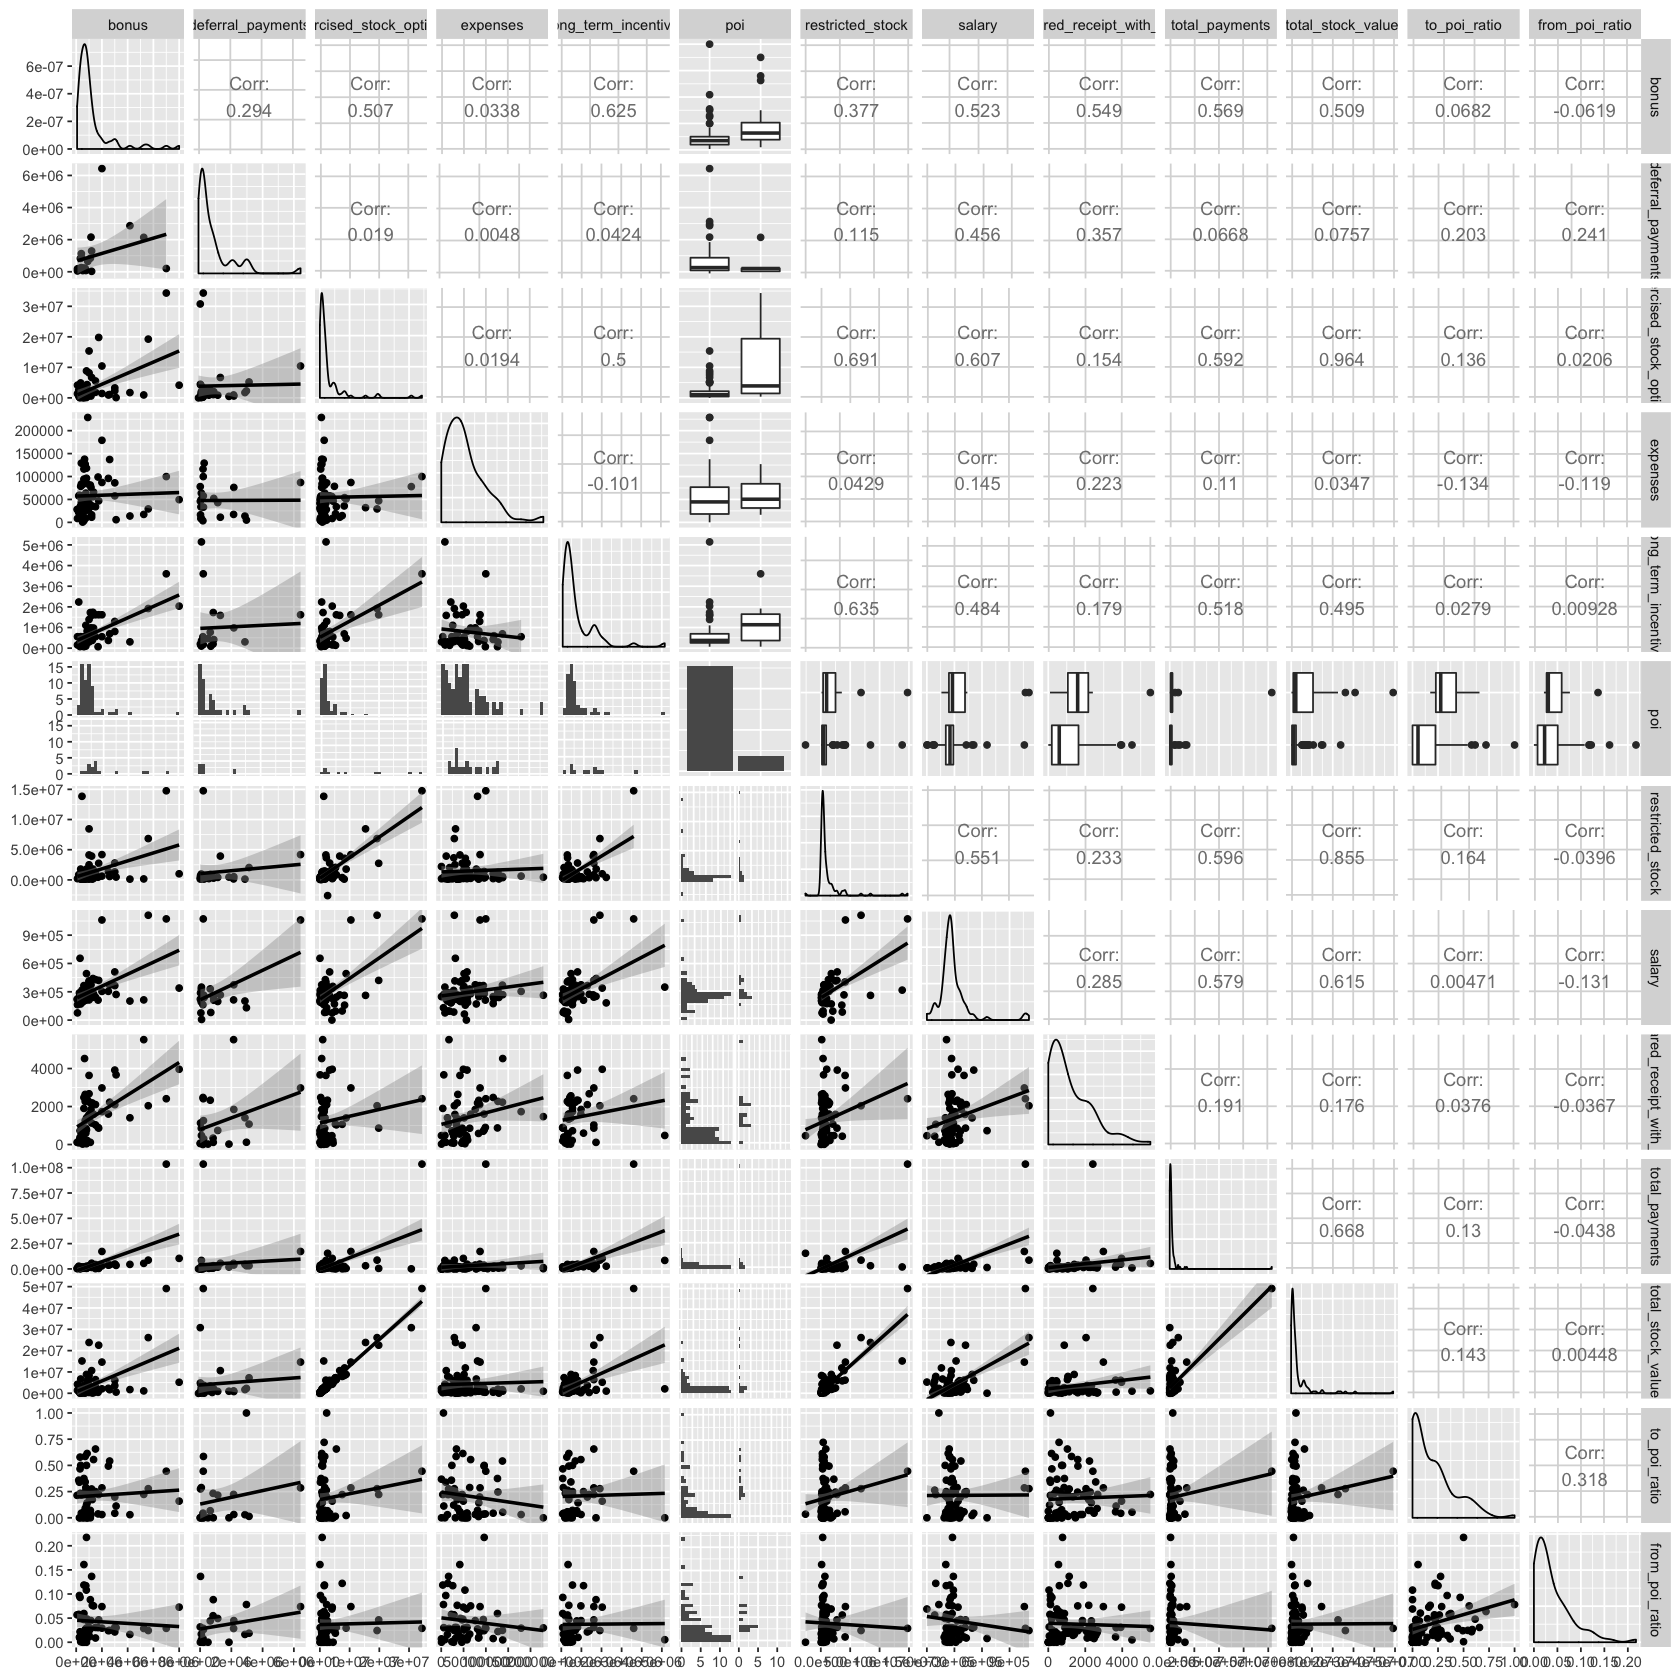

In [28]:
# change the plot configure
options(repr.plot.width=14, repr.plot.height=14)

df.enron.clean  %>% 
    ggpairs(., upper = list(continuous = wrap("cor")),
           lower = list(continuous = "smooth"), progress=F)

### 探索性分析
在评估和清理的阶段已经就单变量分析提供了一些方法和角度，那么接下来将不再继续单变量的分析。使用 ggpairs 可以方便提供双边分析的角度，但是需要注意该方法会因为变量数量的增加而导致运行时间过长。从上面的结果可以看出 total_stock_value 和 exercised_stock_options 之间存在强线性相关性——相关系数达到了 $0.964$，接下来演示从这个角度进行<font color=red><b>双变量分析</b></font>

In [29]:
# change the plot configure
options(repr.plot.width=3, repr.plot.height=3)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


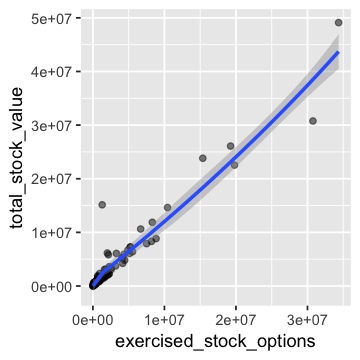

In [30]:
ggplot(aes(x=exercised_stock_options, y=total_stock_value), data = df.enron.clean) + 
    geom_point(alpha=0.5) + 
    geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


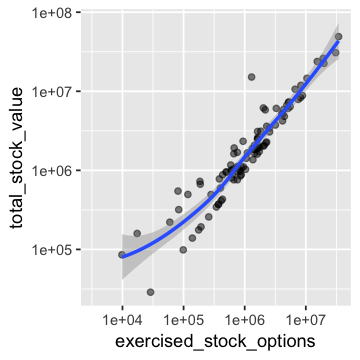

In [31]:
ggplot(aes(x=exercised_stock_options, y=total_stock_value), data = df.enron.clean) + 
    geom_point(alpha=0.5) + 
    geom_smooth() + 
    scale_x_log10() +
    scale_y_log10()

从实际角度来看，exercised_stock_options 和 total_stock_value 这种存在强相关性是可以被理解的，前者是后者的一部分。但是如果是从在建立模型的角度来说，需要考虑将其删除以增加其他特征的影响

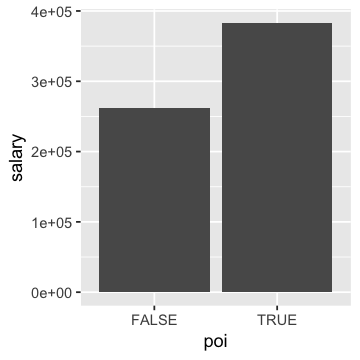

In [32]:
# 假设对是否为 POI 的平均 salary 感兴趣，可以在 geom_bar 中通过 参数进行调整来绘制条形图
# 这就是一个分类变量和数值变量的绘图
ggplot(aes(x=poi, y=salary), data=df.enron.clean) + 
    geom_bar(stat = "summary", fun.y = mean) 

因为是在平面上绘图，如果要进行<font color="red"><b>多变量分析</b></font>，那么需要利用增加其他视觉编码元素进行调整。在数据表达的方面，如果需要突出表达某些差异，可以考虑添加某些辅助线的方式。下面将从 poi 与否，发件交流以及总期权的角度进行多变量分析的演示

In [33]:
# change the plot configure
options(repr.plot.width=10, repr.plot.height=5)

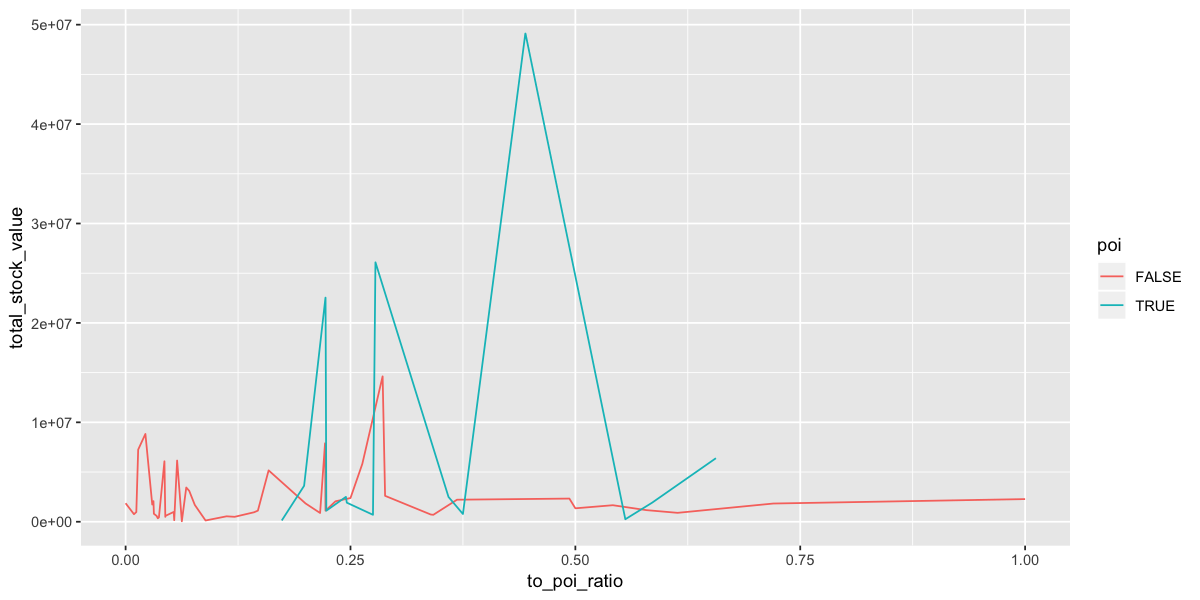

In [34]:
ggplot(aes(x = to_poi_ratio, y = total_stock_value, color = poi), data = df.enron.clean) +
    geom_line(stat = "summary", fun.y = "mean")

发现和 poi 发生发件关系在 $0.5$ 且在拥有大量的 total_stock_value 的员工，很有可能是一个 poi

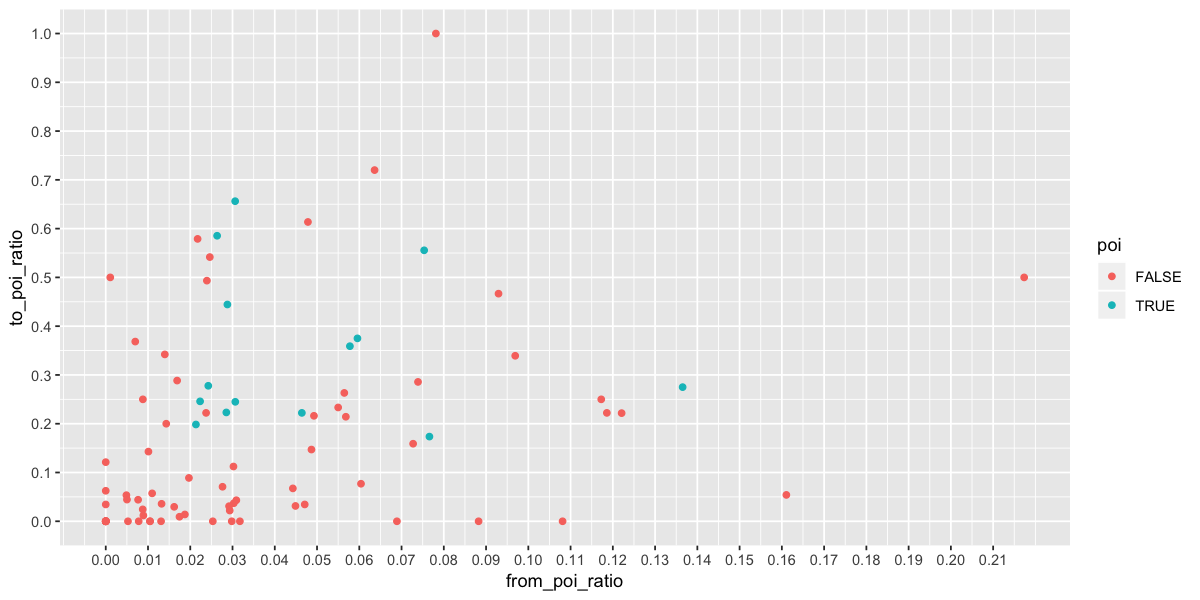

In [35]:
ggplot(aes(x = from_poi_ratio,y = to_poi_ratio,color = poi),data = df.enron.clean)+
  geom_point()+ # 为了更加方便观察，我们加上breaks
  scale_x_continuous(breaks = seq(0,max(df.enron.clean$from_poi_ratio, na.rm = T),0.01))+
  scale_y_continuous(breaks = seq(0,1,0.1))

In [ ]:
# 上面的数据中 poi 主要集中在 from_poi_ratio 区间为 [.02, .14] 以及 to_poi_ratio 区间
# 为 [.15, .7] 之间，考虑对这部分数据进行相关性分析
df.select <- df.enron.clean  %>% 
    keep(is.numeric)  %>% 
    subset(subset = between(from_poi_ratio, .02, .14) & between(to_poi_ratio, .15, .7))

df.select$poi <- as.numeric(df.select$poi)
cor(df.select, df.select$poi, method = "kendall", use = "complete.obs")

### 连续变量到离散变量的转换
分箱处理方式

**总结**：

单变量分析，双变量分析，多变量分析之间是有逻辑的，比如我们从单变量分析发现得异常值、缺失值等等，能保证后续分析得有效，单变量处理过得字段可以在双变量分析中继续使用，然后双变量分析得相关性又会为我们得多变量分析带来一些思路。当然，在分析过程中我们也有一些新得启发，也有一些“随意性”。

## 参考
1. [Dealing with Missing Data using R](https://medium.com/coinmonks/dealing-with-missing-data-using-r-3ae428da2d17)
2. [在R中填充缺失数据—mice包 - 雪晴数据网](http://www.xueqing.tv/cms/article/98)